In [ ]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import shapiro
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

from sklearn.decomposition import PCA



from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras.optimizers import SGD, Adam

%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


In [ ]:
df=pd.read_csv("poke.csv")
df

,ID,Nombre,Tipo,Total,Puntos de vida,Ataque,Defensa,Ataque Especial,Defensa Especial,Velocidad,Primera_generacion,Segunda_generacion
0,1,Bulbasaur,GRASS,318,45,49,49.0,65.0,65,45,si,no
1,2,Ivysaur,GRASS,405,60,62,63.0,80.0,80,60,si,no
2,3,Venusaur,GRASS,525,80,82,83.0,100.0,100,80,si,no
3,4,Charmander,FIRE,309,39,52,43.0,60.0,50,65,si,no
4,5,Charmeleon,FIRE,405,58,64,58.0,80.0,65,80,si,no
5,6,Charizard,FIRE,534,78,84,78.0,109.0,85,100,si,no
6,7,Squirtle,WATER,314,44,48,65.0,50.0,64,43,si,no
7,9,Blastoise,WATER,530,79,83,100.0,85.0,105,78,si,no
8,10,Caterpie,BUG,195,45,30,35.0,20.0,20,45,si,no
9,11,Metapod,BUG,205,50,20,55.0,25.0,25,30,si,no


In [ ]:
df.dtypes

ID                      int64
Nombre                 object
Tipo                   object
Total                   int64
Puntos de vida          int64
Ataque                  int64
Defensa               float64
Ataque Especial       float64
Defensa Especial        int64
Velocidad               int64
Primera_generacion     object
Segunda_generacion     object
dtype: object

In [ ]:
# Estas son nuestras columnas object
cat_cols = df.select_dtypes(include="object").columns

cat_cols

# Transformamos todas las columnas object a categóricas
for col in cat_cols:
  df[col] = pd.Categorical(df[col])

df.dtypes

ID                       int64
Nombre                category
Tipo                  category
Total                    int64
Puntos de vida           int64
Ataque                   int64
Defensa                float64
Ataque Especial        float64
Defensa Especial         int64
Velocidad                int64
Primera_generacion    category
Segunda_generacion    category
dtype: object

In [ ]:
df['Nombre'] = df['Nombre'].cat.codes
df['Tipo'] = df['Tipo'].cat.codes
df['Primera_generacion'] = df['Primera_generacion'].cat.codes
df['Segunda_generacion'] = df['Segunda_generacion'].cat.codes

In [ ]:
df.isnull().sum() / df.shape[0] * 100

ID                    0.000
Nombre                0.000
Tipo                  0.000
Total                 0.000
Puntos de vida        0.000
Ataque                0.000
Defensa               6.250
Ataque Especial       3.125
Defensa Especial      0.000
Velocidad             0.000
Primera_generacion    0.000
Segunda_generacion    0.000
dtype: float64

In [ ]:
df.fillna(0,inplace=True)
df.isnull().sum()

ID                    0
Nombre                0
Tipo                  0
Total                 0
Puntos de vida        0
Ataque                0
Defensa               0
Ataque Especial       0
Defensa Especial      0
Velocidad             0
Primera_generacion    0
Segunda_generacion    0
dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

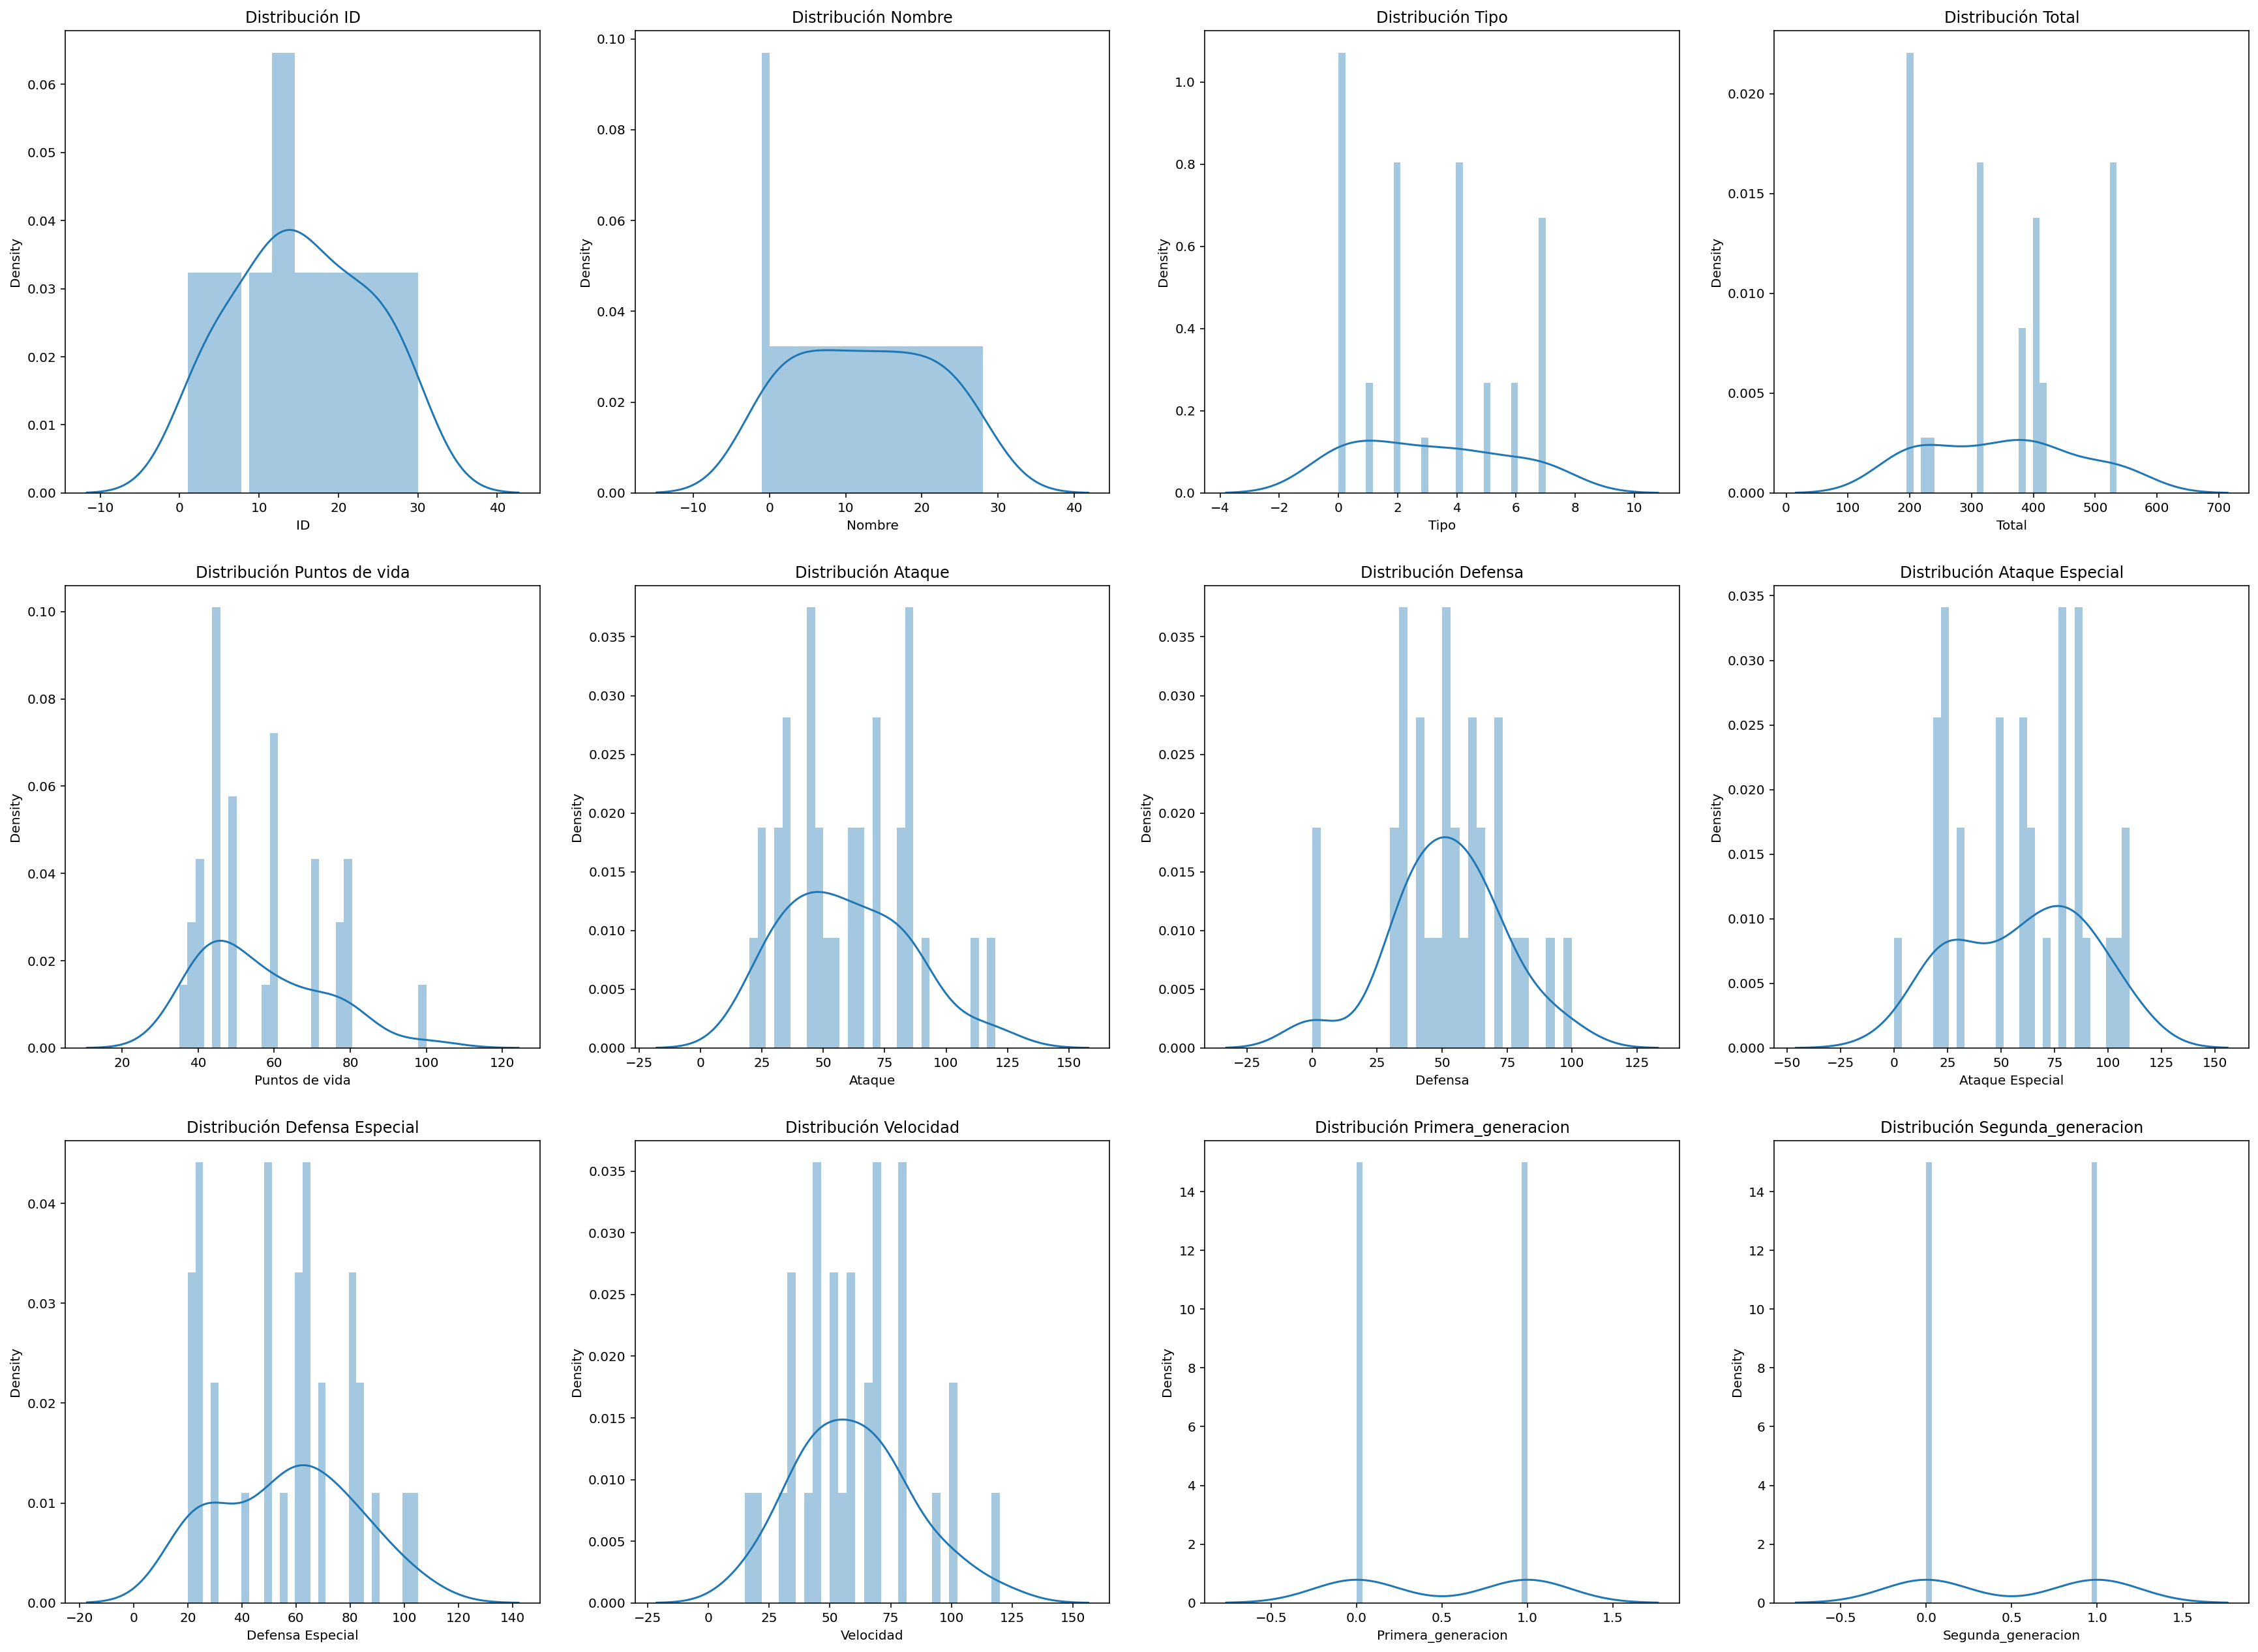

In [ ]:
plt.figure(figsize=(30, 30))
n = 0
for i, column in enumerate(df.columns):
    n += 1
    plt.subplot(4, 4, n)
    try:
        sns.distplot(df[column], bins=30)
    except:
        pass
    plt.title(f'Distribución {column}')
plt.show()

In [ ]:
# Como todas las columnas son numéricas, no necesitamos filtrar ninguna
for col in df.columns:
    stat, p = shapiro(df[col])

    print('Valor de test=%.10f, p-value=%.10f' % (stat, p))

    # Una alpha muy pequeña nos muestra que la variable 'age' proviene de una distribución normal (se ve en el histograma como se parece a dicha distribución)
    alpha = 0.00005
    if p > alpha:
        print(f'La variable {col} proviene de una distribución normal (no rechazamos H0) \n')
    else:
        print(f'La variable {col} NO proviene de una distribución normal (rechazamos H0), por lo tanto H1 \n')

Valor de test=0.9665301442, p-value=0.4095422626
La variable ID proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.9458246231, p-value=0.1096338481
La variable Nombre proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.8884747028, p-value=0.0031918557
La variable Tipo proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.8910309672, p-value=0.0036893140
La variable Total proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.9089181423, p-value=0.0105268676
La variable Puntos de vida proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.9592822790, p-value=0.2625013888
La variable Ataque proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.9685881734, p-value=0.4613718390
La variable Defensa proviene de una distribución normal (no rechazamos H0) 

Valor de test=0.9423249364, p-value=0.0871634260
La variable Ataque Especial proviene de una distribución normal (no rechaz

#Normalizar

In [ ]:
X=df.drop(['Segunda_generacion'],axis=1)
Y=df['Segunda_generacion']

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X1=scaler.fit_transform(X)

#Train y test

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X1,Y, test_size=0.2,random_state=0)

#Regresión lineal



In [ ]:
from sklearn import linear_model

In [ ]:
#Creo un modelo de regresión lineal
modelo=linear_model.LinearRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
parameters={"n_jobs":[-1,0,1,2]}
grid= GridSearchCV(estimator=modelo,param_grid=parameters,cv=3)
                   
grid.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=LinearRegression(),
             param_grid={'n_jobs': [-1, 0, 1, 2]})

In [ ]:
Y_test_pred=grid.predict(X_test)
Y_test_pred

array([ 0.00000000e+00,  1.00000000e+00, -4.44089210e-16,  2.22044605e-16,
        1.00000000e+00, -6.66133815e-16,  1.00000000e+00])

Matriz de confusión

In [ ]:
umbral=0.6
y_umbralizadas=1*(Y_test_pred[:]>umbral)

print(u"Matriz de confusión\n",confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[4 0]
 [0 3]]


R2

In [ ]:
# Obtengo las métricas en train y en test
from sklearn.metrics import r2_score
rl_y_train_pred = grid.predict(X_train)
rl_y_test_pred = grid.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, rl_y_train_pred),4)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, rl_y_test_pred),4)))

La R^2 en los datos de train es: 1.0
La R^2 en los datos de test es: 1.0


#KNN Vecinos

In [ ]:
from sklearn.neighbors import  KNeighborsRegressor

In [ ]:
knnvecinos=KNeighborsRegressor()
params={'n_neighbors': range(1,20)}

In [ ]:
modelgs=GridSearchCV(knnvecinos,params,cv=3)
modelgs.fit(X_train,Y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 705, in score
    y_pred = self.predict(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_regression.py", line 229, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_base.py", line 727, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 16, n_

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 20)})

In [ ]:
kn_test_predict=modelgs.predict(X_test)
kn_test_predict

array([0., 1., 0., 0., 1., 0., 1.])

Matriz de confusión

In [ ]:
umbral=0.6
y_umbralizadas=1*(kn_test_predict[:]>umbral)

print(u"Matriz de confusión\n",confusion_matrix(Y_test, y_umbralizadas))

Matriz de confusión
 [[4 0]
 [0 3]]


R2

In [ ]:
# Obtengo las métricas en train y en test
from sklearn.metrics import r2_score
kn_y_train_pred = grid.predict(X_train)
kn_y_test_pred = grid.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, kn_y_train_pred),4)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, kn_y_test_pred),4)))

La R^2 en los datos de train es: 1.0
La R^2 en los datos de test es: 1.0


#Árboles de decisión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
DecissionTree = DecisionTreeRegressor()
dtr_params = { "max_depth": range(3, 7) }

# Sacamos el mejor estimador probando los diferentes parámetros
dtr_optimizado = GridSearchCV(DecissionTree, dtr_params, cv=3)
dtr_optimizado.fit(X_train, Y_train)

print(f"El mejor estimador es: {dtr_optimizado.best_estimator_}")

El mejor estimador es: DecisionTreeRegressor(max_depth=3)


In [ ]:
dtr_test_pred = dtr_optimizado.predict(X_test)

# Umbralizamos
dtr_umbral_pred = 0.6
dtr_test_umbralizada = 1 * (dtr_test_pred[:] > dtr_umbral_pred)

print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, dtr_test_umbralizada))


Matriz de confusión
 [[4 0]
 [0 3]]


R2

In [ ]:
dtr_train_pred = dtr_optimizado.predict(X_train)
dtr_test_pred = dtr_optimizado.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, dtr_train_pred),4)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, dtr_test_pred),4)))

La R^2 en los datos de train es: 1.0
La R^2 en los datos de test es: 1.0


#Bosques aleatorios

In [ ]:
from numpy import mean, std
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score, RepeatedKFold

In [ ]:
# Defino un modelo
RandomForest = RandomForestRegressor()

In [ ]:
# Evalúo el modelo
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(RandomForest, X_train, Y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')
# Obtengo una métrica de rendimiento
print(u'Obtengo el error absoluto medio (MAE): %.3f, desviación %.3f' % (mean(n_scores), std(n_scores)))

Obtengo el error absoluto medio (MAE): -0.012, desviación 0.017


In [ ]:
RandomForest.fit(X_train,Y_train)
rf_test_predict = RandomForest.predict(X_test)

Matriz de confusión

In [ ]:
rf_test_umbralizada=1*(rf_test_predict[:]>umbral)

In [ ]:
print(u"Matriz de confusión\n", metrics.confusion_matrix(Y_test, rf_test_umbralizada))

Matriz de confusión
 [[4 0]
 [1 2]]


R2

In [ ]:
rf_train_pred = RandomForest.predict(X_train)
rf_test_pred = RandomForest.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, rf_train_pred),4)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, rf_test_pred),4)))

La R^2 en los datos de train es: 1.0
La R^2 en los datos de test es: 0.9019


#XGBOOST

In [ ]:
import xgboost 

In [ ]:
xgb = xgboost.XGBRegressor()
params = {"eta": [0.3, 0.5], "lambda":[0.5, 1.0], "max_depth": [3, 7]}
xgb_opt = GridSearchCV(xgb, params, cv=3)
xgb_opt.fit(X_train, Y_train)
print('Los mejores hiperparámetros son: {}'.format(xgb_opt.best_params_))

[17:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
xgb_train_predict = xgb_opt.predict(X_train)
xgb_test_predict = xgb_opt.predict(X_test)

Matriz de confusión

In [ ]:
xgb_test_umbralizada=1*(xgb_test_predict[:]>umbral)

In [ ]:

print(u"Matriz de confusión\n", confusion_matrix(Y_test, xgb_test_umbralizada))

Matriz de confusión
 [[4 0]
 [0 3]]


R2

In [ ]:
xgb_train_predict = xgb_opt.predict(X_train)
xgb_test_predict = xgb_opt.predict(X_test)
print('La R^2 en los datos de train es: {}'.format(np.round(r2_score(Y_train, xgb_train_pred),4)))
print('La R^2 en los datos de test es: {}'.format(np.round(r2_score(Y_test, xgb_test_pred),4)))

La R^2 en los datos de train es: 1.0
La R^2 en los datos de test es: 1.0
